# Context

Vous devez fournir des analyses concernant la répartition de l'alimentation, la sous-nutrition mais également en comprendre les causes.

# Imports 

## Import des librairies

In [616]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

## Import des données 

In [617]:
dispo_alimentaire = pd.read_csv('data/dispo_alimentaire.csv')

In [618]:
aide_alimentaire = pd.read_csv('data/aide_alimentaire.csv')

In [619]:
population = pd.read_csv('data/population.csv')

In [620]:
sous_nutrition = pd.read_csv('data/sous_nutrition.csv')

## change columns/values

In [621]:
aide_alimentaire = aide_alimentaire.rename(columns = {'Pays bénéficiaire': 'Zone'})
sous_nutrition = sous_nutrition.rename(columns = {'Valeur': 'ratio_sous_nutrition'})
population = population.rename(columns = {'Valeur': 'nb_population (millier)'})

In [622]:
sous_nutrition["Année"] = sous_nutrition["Année"].map({'2012-2014': 2013,
                                                       '2013-2015': 2014,
                                                       '2014-2016': 2015,
                                                       '2015-2017': 2016,
                                                       '2017-2019': 2017})

In [623]:
sous_nutrition.shape

(1218, 3)

In [624]:
sous_nutrition = sous_nutrition.dropna(subset =['Année'])

In [625]:
sous_nutrition.shape

(1015, 3)

In [626]:
sous_nutrition

Zone   Année ratio_sous_nutrition
0     Afghanistan  2013.0                  8.6
1     Afghanistan  2014.0                  8.8
2     Afghanistan  2015.0                  8.9
3     Afghanistan  2016.0                  9.7
5     Afghanistan  2017.0                 11.1
...           ...     ...                  ...
1212     Zimbabwe  2013.0                  NaN
1213     Zimbabwe  2014.0                  NaN
1214     Zimbabwe  2015.0                  NaN
1215     Zimbabwe  2016.0                  NaN
1217     Zimbabwe  2017.0                  NaN

[1015 rows x 3 columns]

In [627]:
sous_nutrition.dtypes

Zone                     object
Année                   float64
ratio_sous_nutrition     object
dtype: object

In [628]:
population.dtypes

Zone                        object
Année                        int64
nb_population (millier)    float64
dtype: object

In [629]:
sous_nutrition["Année"] = sous_nutrition["Année"].astype(int)

In [630]:
sous_nutrition.dtypes

Zone                    object
Année                    int64
ratio_sous_nutrition    object
dtype: object

## Join ?

In [631]:
# df_1 = dispo_alimentaire.merge(population, on = "Zone", how = "left")
# df_2 = df_1.merge(sous_nutrition, on = "Zone", how = "left")
# df = df_2.merge(aide_alimentaire, on = "Zone", how = "left")

In [632]:
# df.shape

# EDA

## df_2017

In [633]:
df_sous = population.merge(sous_nutrition, on = "Zone", how = "left")

In [634]:
df_sous = df_sous.dropna()

In [635]:
df_sous.isnull().sum()

Zone                       0
Année_x                    0
nb_population (millier)    0
Année_y                    0
ratio_sous_nutrition       0
dtype: int64

In [636]:
df_sous = df_sous.drop(["Année_y"], axis = 1)

In [637]:
df_sous_2017 = df_sous.loc[df_sous["Année_x"] == 2017]

In [638]:
df_sous_2017["nb__population (million)"] = round(df_sous_2017["nb_population (millier)"] / 1000, 2)

/tmp/ipykernel_2235/1549558547.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sous_2017["nb__population (million)"] = round(df_sous_2017["nb_population (millier)"] / 1000, 2)


In [639]:
df_sous_2017

Zone  Année_x  nb_population (millier) ratio_sous_nutrition  \
20    Afghanistan     2017                36296.113                  8.6   
21    Afghanistan     2017                36296.113                  8.8   
22    Afghanistan     2017                36296.113                  8.9   
23    Afghanistan     2017                36296.113                  9.7   
24    Afghanistan     2017                36296.113                 11.1   
...           ...      ...                      ...                  ...   
6188     Viet Nam     2017                94600.648                  8.9   
6189     Viet Nam     2017                94600.648                  8.3   
6190     Viet Nam     2017                94600.648                  7.6   
6191     Viet Nam     2017                94600.648                  7.1   
6192     Viet Nam     2017                94600.648                  6.1   

      nb__population (million)  
20                        36.3  
21                        36.3  
22                        36.3  
23                        36.3  
24                        36.3  
...                        ...  
6188                      94.6  
6189                      94.6  
6190                      94.6  
6191                      94.6  
6192                      94.6  

[520 rows x 5 columns]

## Outliers

## Change columns

# Visualisation

Pour une étude, nous souhaitons avoir les informations suivantes, sur l’année 2017 :

- la proportion de personnes en état de sous-nutrition ;
- le nombre théorique de personnes qui pourraient être nourries. Tu devrais pouvoir calculer ça à partir de la disponibilité alimentaire mondiale ;
- idem pour la disponibilité alimentaire des produits végétaux ;
- les pays pour lesquels la proportion de personnes sous-alimentées est la plus forte
- Ceux ayant le plus/le moins de disponibilité/habitant, etc., Travailler ensuite une fonction permettant de sortir ce résultat pour toutes les années. Vous devrez, dans un nouveau notebook, permettre à l’utilisateur de remplir manuellement une année et d’obtenir le résultat pour chacune des questions précédentes (pour les plus aguerrit : une application avec Flask, Dash ou Streamlit me va aussi 😊).

In [640]:
no_sous_nutrition = df_sous_2017.loc[df_sous_2017["ratio_sous_nutrition"] == "<0.1"]

In [641]:
df_sous_2017 = df_sous_2017.loc[df_sous_2017["ratio_sous_nutrition"] != "<0.1"]

In [642]:
df_sous_2017["ratio_sous_nutrition"] = df_sous_2017["ratio_sous_nutrition"].astype(float)

/tmp/ipykernel_2235/3641429192.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sous_2017["ratio_sous_nutrition"] = df_sous_2017["ratio_sous_nutrition"].astype(float)


In [643]:
# la proportion de personnes en état de sous-nutrition
df_sous_2017["proportion_sous_nutrition"] = df_sous_2017["ratio_sous_nutrition"] / df_sous_2017["nb__population (million)"]

/tmp/ipykernel_2235/2687403467.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sous_2017["proportion_sous_nutrition"] = df_sous_2017["ratio_sous_nutrition"] / df_sous_2017["nb__population (million)"]


In [644]:
gb_sous_alimentation = df_sous_2017.groupby(by = "Zone").mean().reset_index()

In [645]:
gb_sous_alimentation["proportion_sous_nutrition"] = gb_sous_alimentation["ratio_sous_nutrition"] / gb_sous_alimentation["nb__population (million)"]

In [646]:
gb_sous_alimentation

Zone  Année_x  nb_population (millier)  \
0           Afghanistan   2017.0                36296.113   
1        Afrique du Sud   2017.0                57009.756   
2               Albanie   2017.0                 2884.169   
3               Algérie   2017.0                41389.189   
4                Angola   2017.0                29816.766   
..                  ...      ...                      ...   
82             Viet Nam   2017.0                94600.648   
83               Égypte   2017.0                96442.591   
84  Émirats arabes unis   2017.0                 9487.203   
85             Équateur   2017.0                16785.361   
86             Éthiopie   2017.0               106399.924   

    ratio_sous_nutrition  nb__population (million)  proportion_sous_nutrition  
0                   9.42                     36.30                   0.259504  
1                   2.76                     57.01                   0.048413  
2                   0.10                      2.88                   0.034722  
3                   1.28                     41.39                   0.030925  
4                   6.08                     29.82                   0.203890  
..                   ...                       ...                        ...  
82                  7.60                     94.60                   0.080338  
83                  4.40                     96.44                   0.045624  
84                  0.30                      9.49                   0.031612  
85                  1.72                     16.79                   0.102442  
86                 23.00                    106.40                   0.216165  

[87 rows x 6 columns]

In [647]:
# # Créer un diagramme circulaire avec seaborn et matplotlib
# plt.figure(figsize=(8,8))
# sns.set_style("whitegrid")
# plt.pie(x=gb_sous_alimentation['proportion_sous_nutrition'], labels=gb_sous_alimentation.index, autopct='%1.1f%%')
# plt.title("Proportion de personnes en état de sous-nutrition par rapport à la population totale")
# plt.show()

In [648]:
gb_worse_sous_nutrition = gb_sous_alimentation.sort_values(by = ["proportion_sous_nutrition"], ascending = False)
gb_best_sous_nutrition = gb_sous_alimentation.sort_values(by = ["proportion_sous_nutrition"], ascending = True)

In [649]:
gb_best_sous_nutrition.head(5)

Zone  Année_x  nb_population (millier)  \
78              Tunisie   2017.0                11433.443   
37           Kazakhstan   2017.0                18080.019   
6             Argentine   2017.0                43937.140   
3               Algérie   2017.0                41389.189   
84  Émirats arabes unis   2017.0                 9487.203   

    ratio_sous_nutrition  nb__population (million)  proportion_sous_nutrition  
78                 0.300                     11.43                   0.026247  
37                 0.500                     18.08                   0.027655  
6                  1.325                     43.94                   0.030155  
3                  1.280                     41.39                   0.030925  
84                 0.300                      9.49                   0.031612

In [650]:
gb_worse_sous_nutrition.head(5)

Zone  Année_x  \
29                                       Haïti   2017.0   
66  République populaire démocratique de Corée   2017.0   
43                                  Madagascar   2017.0   
42                                     Libéria   2017.0   
74                                       Tchad   2017.0   

    nb_population (millier)  ratio_sous_nutrition  nb__population (million)  \
29                10982.366                  5.18                     10.98   
66                25429.825                 11.22                     25.43   
43                25570.512                  9.46                     25.57   
42                 4702.226                  1.68                      4.70   
74                15016.753                  5.26                     15.02   

    proportion_sous_nutrition  
29                   0.471767  
66                   0.441211  
43                   0.369965  
42                   0.357447  
74                   0.350200

Text(0.5, 1.0, 'Total of salaries per Services')

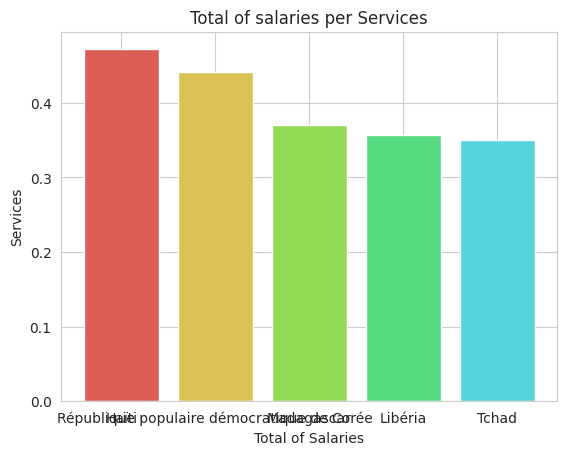

In [654]:
y_worse = [0.471767, 0.441211, 0.369965, 0.357447, 0.350200]
labels_worse = ["Haïti", "République populaire démocratique de Corée", "Madagascar", "Libéria", "Tchad"]
colors = sns.color_palette("hls", 8)

fig, ax = plt.subplots()

ax.bar(labels_worse, y_worse, color = colors)
ax.set_xlabel("Total of Salaries")
ax.set_ylabel("Services")
ax.set_title("Total of salaries per Services")